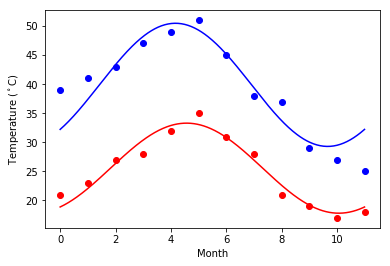

In [1]:
# 1) Scipy: We have the min and max temperatures in a city In India for each months of the year. We would like to find a function to describe this and show it graphically, the dataset given below.
# Task:
# 1. fitting it to the periodic function
# 2. plot the fit
# Data
# Max = 39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25
# Min = 21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
 
from scipy import interpolate
from scipy import optimize

xmonths = np.arange(12)
tempmax = np.array([39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25])
tempmin = np.array([21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18]) 

def yearly_temps(times, avg, ampl, time_offset):
    return (avg + ampl * np.cos((times + time_offset) * 2 * np.pi / times.max()))


xdays = np.linspace(0,11,365)



res_max, cov_max = optimize.curve_fit(yearly_temps, xmonths, tempmax, [20, 10, 0])
res_min, cov_min = optimize.curve_fit(yearly_temps, xmonths, tempmin, [-40, 20, 0])

plt.plot(xmonths,tempmax,'bo')
plt.plot(xdays,yearly_temps(xdays,*res_max),'b-')

plt.plot(xmonths,tempmin,'ro')
plt.plot(xdays,yearly_temps(xdays,*res_min),'r-')

plt.xlabel('Month')
plt.ylabel('Temperature ($^\circ$C)')
plt.show()


The Female and Male distribution is : 
 ---------------------------------------------------------------------------------------------------- 
 sex
female    466
male      843
Name: sexInNum, dtype: int64
The Plot for Gender Distribution :
 --------------------------------------------------------------------------------

 The Plot for Fare Paid and Age by Gender :
 --------------------------------------------------------------------------------


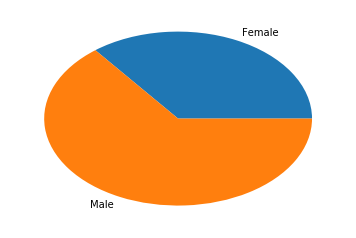

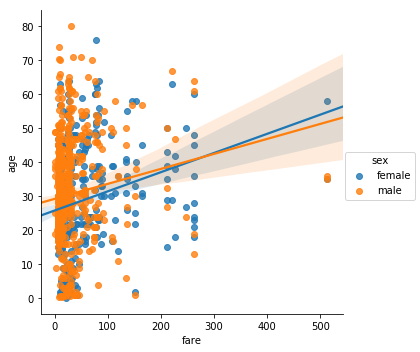

In [2]:
# Matplotlib: This assignment is for visualization using matplotlib: "https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv"
# titanic = pd.read_csv(url)
# Charts to plot: 1) Create a pie chart presenting the male/female proportion
                 #2)Create a scatterplot with the Fare paid and the Age, differ the plot color by gender
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sp


df = pd.read_csv('https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv')


# 1. To Create a Pie Chart of MAle and FEmale distribution , as the sex column is string , creating another column of numbers 1 for female and 0 for male

df['sexInNum'] = np.where((df['sex'] == 'female') ,1 ,0) 
print("The Female and Male distribution is : \n",'-'*100,'\n',df.groupby('sex')['sexInNum'].count())


print("The Plot for Gender Distribution :\n",'-'*80)
plt.pie(df.groupby('sex')['sexInNum'].count(),labels=('Female','Male'))


# 2. To Create Scatter plot of Fare paid and Age , differ the plot color by gender as the matplotlib doesnt give categorywise colours ,so using seaborn lmplot which gives this feature

sp.lmplot(x = "fare",y = "age",data=df, hue="sex")
print("\n The Plot for Fare Paid and Age by Gender :\n",'-'*80)
